In [86]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [87]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [88]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [89]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy


In [90]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [91]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [92]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0c31434299f1a4a0fce1a5bfa1b251f4


In [93]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [94]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | raga
Processing Record 3 of Set 1 | nishihara
Processing Record 4 of Set 1 | nikolskoye
Processing Record 5 of Set 1 | porosozero
Processing Record 6 of Set 1 | tuy hoa
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | myitkyina
Processing Record 9 of Set 1 | avera
Processing Record 10 of Set 1 | tateyama
Processing Record 11 of Set 1 | ca mau
Processing Record 12 of Set 1 | normandin
Processing Record 13 of Set 1 | tierralta
Processing Record 14 of Set 1 | lompoc
Processing Record 15 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 16 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | sabha
Processing Record 21 of Set 1 | dikson
Processing Record 22 of Set 1 | kamaishi
Pr

Processing Record 40 of Set 4 | andenes
Processing Record 41 of Set 4 | norman wells
Processing Record 42 of Set 4 | longyearbyen
Processing Record 43 of Set 4 | riberalta
Processing Record 44 of Set 4 | arraial do cabo
Processing Record 45 of Set 4 | svarstad
Processing Record 46 of Set 4 | aykhal
Processing Record 47 of Set 4 | linchuan
City not found. Skipping...
Processing Record 48 of Set 4 | wanaka
Processing Record 49 of Set 4 | bubaque
Processing Record 50 of Set 4 | lubango
Processing Record 1 of Set 5 | onverwacht
Processing Record 2 of Set 5 | mpanda
Processing Record 3 of Set 5 | cidreira
Processing Record 4 of Set 5 | nhulunbuy
Processing Record 5 of Set 5 | padang
Processing Record 6 of Set 5 | uige
Processing Record 7 of Set 5 | vila franca do campo
Processing Record 8 of Set 5 | bandarbeyla
Processing Record 9 of Set 5 | lavrentiya
Processing Record 10 of Set 5 | bambous virieux
Processing Record 11 of Set 5 | jinchang
Processing Record 12 of Set 5 | vila do maio
Proces

Processing Record 28 of Set 8 | oum hadjer
Processing Record 29 of Set 8 | kawana waters
City not found. Skipping...
Processing Record 30 of Set 8 | prince rupert
Processing Record 31 of Set 8 | sarankhola
Processing Record 32 of Set 8 | derzhavinsk
Processing Record 33 of Set 8 | mykolayivka
Processing Record 34 of Set 8 | cockburn town
Processing Record 35 of Set 8 | saskylakh
Processing Record 36 of Set 8 | alice springs
Processing Record 37 of Set 8 | ponta do sol
Processing Record 38 of Set 8 | kuching
Processing Record 39 of Set 8 | north bend
Processing Record 40 of Set 8 | abu dhabi
Processing Record 41 of Set 8 | santo tomas
Processing Record 42 of Set 8 | elblag
Processing Record 43 of Set 8 | hammerfest
Processing Record 44 of Set 8 | kidal
Processing Record 45 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 46 of Set 8 | seoul
Processing Record 47 of Set 8 | vardo
Processing Record 48 of Set 8 | manitouwadge
Processing Record 49 of Set 8 | port elizabeth

Processing Record 17 of Set 12 | aripuana
Processing Record 18 of Set 12 | fortuna foothills
Processing Record 19 of Set 12 | margate
Processing Record 20 of Set 12 | wulanhaote
City not found. Skipping...
Processing Record 21 of Set 12 | qurayyat
Processing Record 22 of Set 12 | killybegs
Processing Record 23 of Set 12 | ayios matthaios
City not found. Skipping...
Processing Record 24 of Set 12 | cozumel
Processing Record 25 of Set 12 | new philadelphia
Processing Record 26 of Set 12 | orlik
Processing Record 27 of Set 12 | abha
Processing Record 28 of Set 12 | chicama
Processing Record 29 of Set 12 | crawfordsville
Processing Record 30 of Set 12 | kruisfontein
Processing Record 31 of Set 12 | cabadiangan
Processing Record 32 of Set 12 | matucana
Processing Record 33 of Set 12 | petauke
Processing Record 34 of Set 12 | dianopolis
City not found. Skipping...
Processing Record 35 of Set 12 | charters towers
Processing Record 36 of Set 12 | staryy nadym
Processing Record 37 of Set 12 | a

In [118]:
len(city_data)

575

In [119]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.15,-70.92,44.60,65,45,10.29,CL,2020-09-03 22:05:32
1,Raga,8.46,25.68,70.68,96,100,2.13,SS,2020-09-03 22:07:00
2,Nishihara,26.18,127.76,80.60,100,40,6.93,JP,2020-09-03 22:07:01
3,Nikolskoye,59.70,30.79,63.00,93,90,4.47,RU,2020-09-03 22:07:01
4,Porosozero,62.72,32.73,54.79,83,64,6.85,RU,2020-09-03 22:07:01
5,Tuy Hoa,13.08,109.30,77.00,88,84,3.29,VN,2020-09-03 22:07:02
6,Vaini,-21.20,-175.20,73.40,60,20,17.22,TO,2020-09-03 22:06:12
7,Myitkyina,25.38,97.40,75.78,75,95,1.12,MM,2020-09-03 22:07:02
8,Avera,33.19,-82.53,93.20,52,1,8.05,US,2020-09-03 22:07:02
9,Tateyama,34.98,139.87,82.99,80,43,1.99,JP,2020-09-03 22:07:03


In [120]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df [new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2020-09-03 22:05:32,-53.15,-70.92,44.60,65,45,10.29
1,Raga,SS,2020-09-03 22:07:00,8.46,25.68,70.68,96,100,2.13
2,Nishihara,JP,2020-09-03 22:07:01,26.18,127.76,80.60,100,40,6.93
3,Nikolskoye,RU,2020-09-03 22:07:01,59.70,30.79,63.00,93,90,4.47
4,Porosozero,RU,2020-09-03 22:07:01,62.72,32.73,54.79,83,64,6.85


In [131]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label= "City_ID")


In [132]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [133]:
# Insert the time module
import time

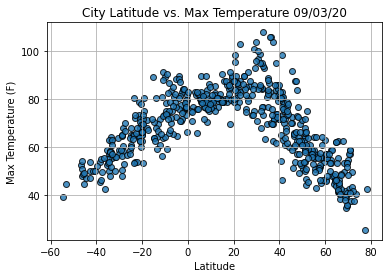

In [134]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

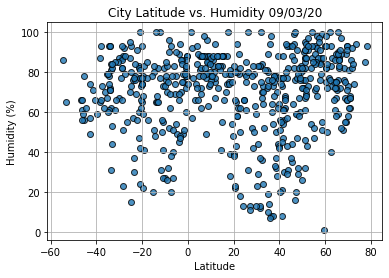

In [135]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

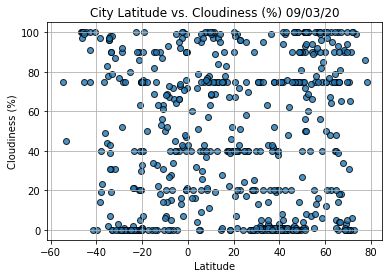

In [136]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


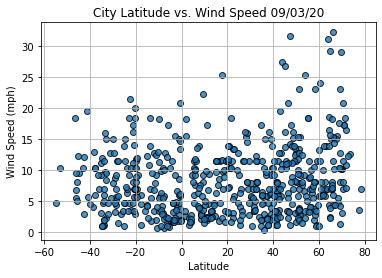

In [137]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [193]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [209]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [210]:
cities_to_load = "weather_data/cities.csv"
city_data_df= pd.read_csv(cities_to_load)

In [211]:
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                       Lompoc
Country                        US
Date          2020-09-03 22:05:49
Lat                         34.64
Lng                       -120.46
Max Temp                     69.8
Humidity                       72
Cloudiness                      1
Wind Speed                  17.22
Name: 13, dtype: object

In [212]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,1,Raga,SS,2020-09-03 22:07:00,8.46,25.68,70.68,96,100,2.13
2,2,Nishihara,JP,2020-09-03 22:07:01,26.18,127.76,80.60,100,40,6.93
3,3,Nikolskoye,RU,2020-09-03 22:07:01,59.70,30.79,63.00,93,90,4.47
4,4,Porosozero,RU,2020-09-03 22:07:01,62.72,32.73,54.79,83,64,6.85
5,5,Tuy Hoa,VN,2020-09-03 22:07:02,13.08,109.30,77.00,88,84,3.29
...,...,...,...,...,...,...,...,...,...,...
564,564,Ust-Ishim,RU,2020-09-03 22:09:39,57.69,71.17,46.40,91,100,10.45
565,565,Sisimiut,GL,2020-09-03 22:09:40,66.94,-53.67,48.54,52,100,4.36
567,567,Shuangcheng,CN,2020-09-03 22:09:40,45.35,126.28,59.00,93,75,26.84
573,573,Pudozh,RU,2020-09-03 22:09:42,61.81,36.53,57.25,77,77,6.04


In [213]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

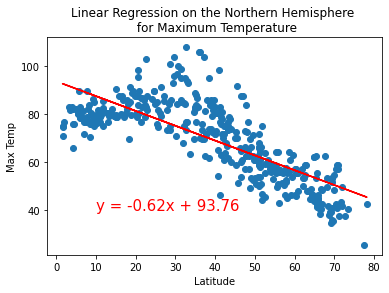

In [214]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Northern Hemisphere \n for Maximum Temperature", "Max Temp",(10,40))

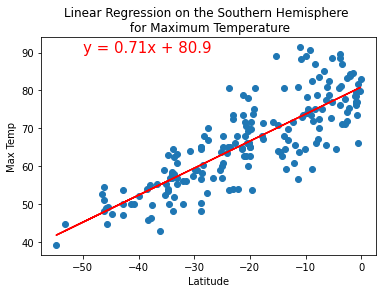

In [216]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

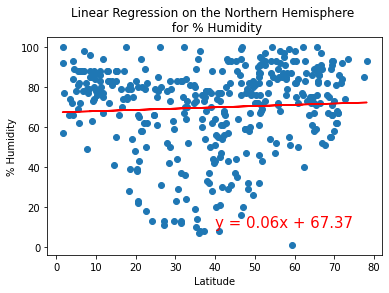

In [217]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

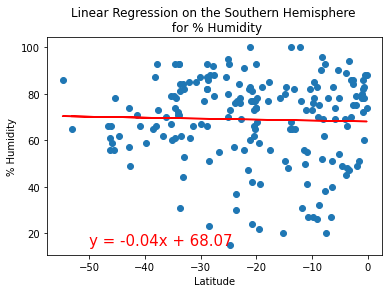

In [219]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

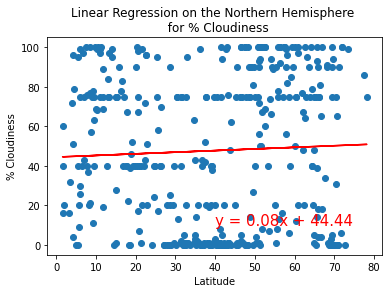

In [225]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n  for % Cloudiness', '% Cloudiness',(40,10))

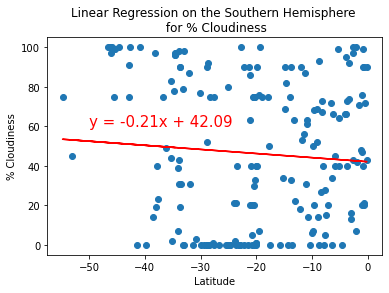

In [224]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

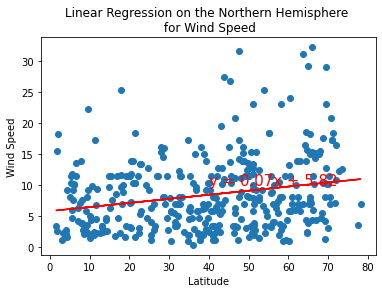

In [227]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,10))

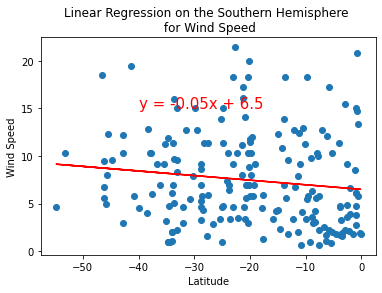

In [229]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-40,15))